In [9]:
import pandas as pd

# Загрузка данных
df = pd.read_csv('Sleep_Health_Lifestyle_preprocessed.csv')

In [11]:
from sklearn.cluster import KMeans

# Выбираем признаки для кластеризации
X = df[['Age', 'Stress Level', 'Quality of Sleep', 'Systolic_BP', 'Diastolic_BP', 'BMI_Code']]

# Создаем и обучаем модель
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)  # Добавляем метки кластеров в DataFrame

# Проверяем
print("Кластеры созданы. Пример данных:")
print(df[['Age', 'Stress Level', 'Quality of Sleep', 'Diastolic_BP', 'BMI_Code', 'Cluster']].head())

Кластеры созданы. Пример данных:
   Age  Stress Level  Quality of Sleep  Diastolic_BP  BMI_Code  Cluster
0   27             6                 6            83         1        2
1   28             8                 6            80         0        2
2   28             8                 6            80         0        2
3   28             8                 4            90         2        2
4   28             8                 4            90         2        2



Кластер 0:


,Age,Stress Level,Quality of Sleep,Diastolic_BP,BMI_Code
count,78.000000,78.000000,78.000000,78.000000,78.000000
mean,44.525641,3.692308,8.410256,77.679487,0.025641
std,7.815609,0.842194,0.612338,2.499317,0.159085
min,35.000000,3.000000,6.000000,75.000000,0.000000
25%,37.000000,3.000000,8.000000,75.000000,0.000000
50%,40.500000,4.000000,8.000000,78.500000,0.000000
75%,53.000000,4.000000,9.000000,80.000000,0.000000
max,56.000000,7.000000,9.000000,82.000000,1.000000



Кластер 1:


,Age,Stress Level,Quality of Sleep,Diastolic_BP,BMI_Code
count,102.000000,102.000000,102.000000,102.000000,102.000000
mean,51.088235,5.166667,7.372549,92.950980,1.039216
std,5.421086,2.157572,1.250121,2.979725,0.195066
min,43.000000,3.000000,6.000000,85.000000,1.000000
25%,45.000000,3.000000,6.000000,90.000000,1.000000
50%,50.000000,4.000000,7.000000,95.000000,1.000000
75%,57.000000,8.000000,9.000000,95.000000,1.000000
max,59.000000,8.000000,9.000000,95.000000,2.000000



Кластер 2:


,Age,Stress Level,Quality of Sleep,Diastolic_BP,BMI_Code
count,194.000000,194.000000,194.000000,194.000000,194.000000
mean,36.561856,6.180412,6.840206,83.087629,0.309278
std,5.453410,1.244023,1.043227,2.779934,0.526221
min,27.000000,3.000000,4.000000,76.000000,0.000000
25%,31.000000,5.000000,6.000000,80.000000,0.000000
50%,37.000000,6.000000,7.000000,85.000000,0.000000
75%,42.000000,7.000000,8.000000,85.000000,1.000000
max,44.000000,8.000000,8.000000,90.000000,2.000000


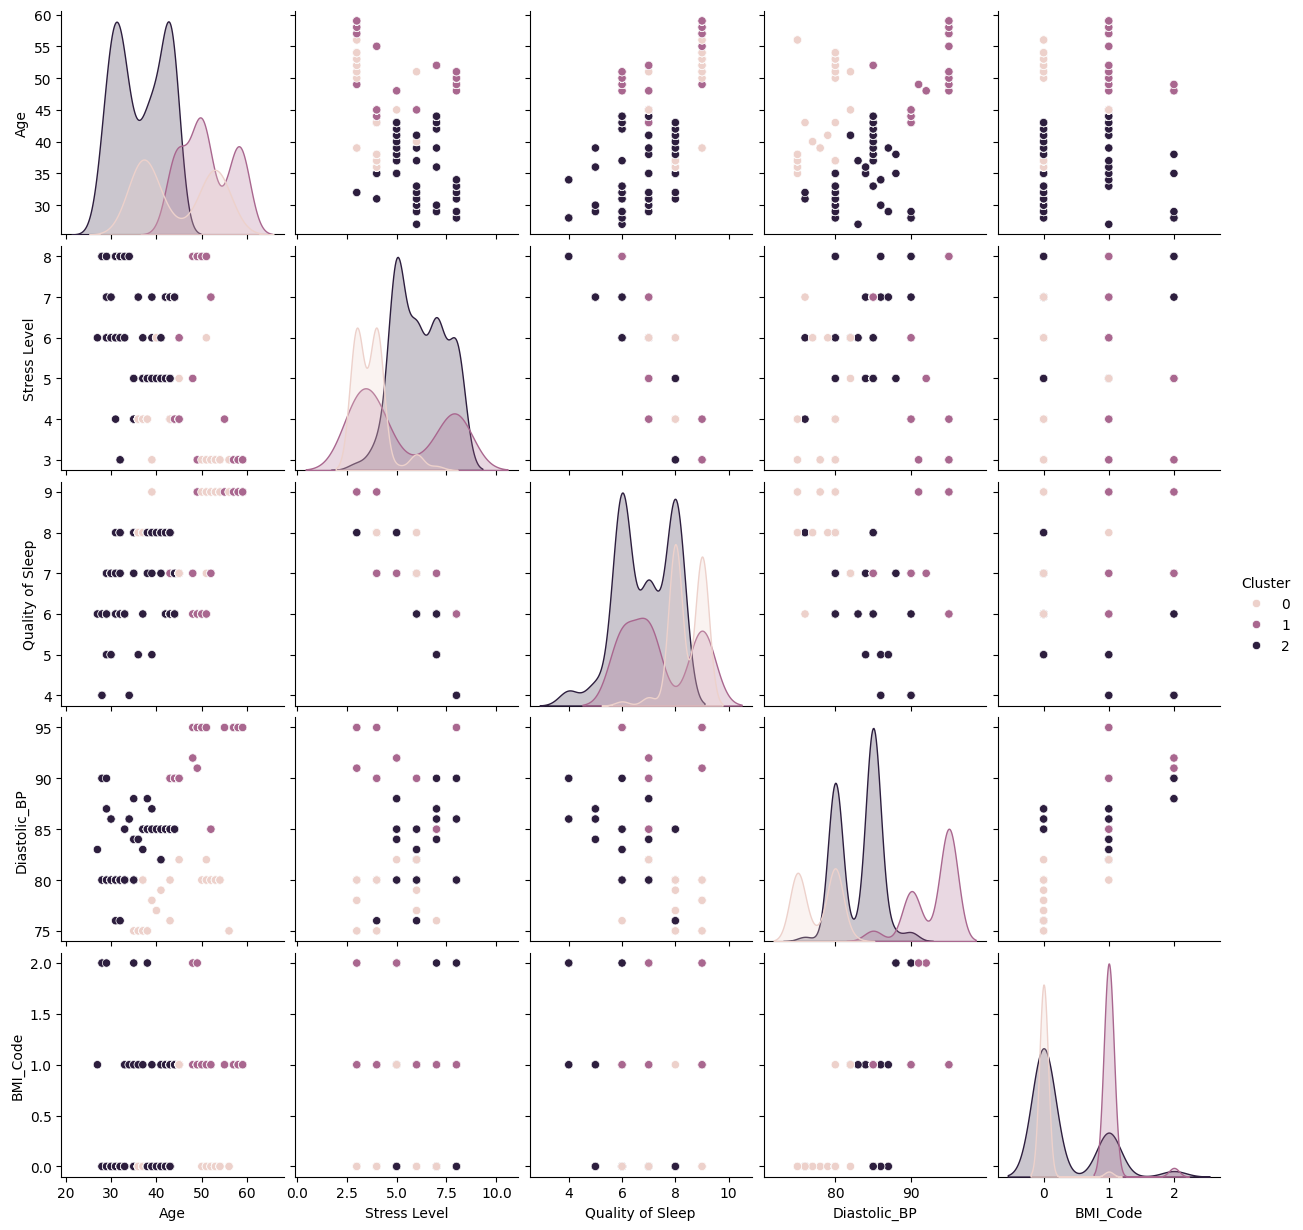

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# Пример: статистика по кластерам
for cluster in sorted(df['Cluster'].unique()):
    print(f"\nКластер {cluster}:")
    display(df[df['Cluster'] == cluster][['Age', 'Stress Level', 'Quality of Sleep', 'Diastolic_BP', 'BMI_Code']].describe())

# Визуализация
sns.pairplot(df, vars=['Age', 'Stress Level', 'Quality of Sleep', 'Diastolic_BP', 'BMI_Code'], hue='Cluster')
plt.savefig('clusters_pairplot.png')

In [14]:
# Гипотеза: "Кластер с высоким стрессом имеет низкое качество сна"
high_stress_cluster = df.groupby('Cluster')['Stress Level'].mean().idxmax()
print(f"\nКластер с максимальным стрессом: {high_stress_cluster}")
print("Среднее качество сна в этом кластере:", 
      df[df['Cluster'] == high_stress_cluster]['Quality of Sleep'].mean())


Кластер с максимальным стрессом: 2
Среднее качество сна в этом кластере: 6.84020618556701


In [19]:
with open('cluster_report.txt', 'w', encoding='utf-8') as f:
    for cluster in sorted(df['Cluster'].unique()):
        f.write(f"Кластер {cluster}:\n")
        f.write(f"- Размер: {len(df[df['Cluster'] == cluster])}\n")
        f.write(f"- Средний стресс: {df[df['Cluster'] == cluster]['Stress Level'].mean():.1f}\n")
        f.write(f"- Среднее качество сна: {df[df['Cluster'] == cluster]['Quality of Sleep'].mean():.1f}\n\n")

In [20]:
with open('cluster_report.txt', 'w', encoding='utf-8') as f:
    for cluster in sorted(df['Cluster'].unique()):
        # Формируем строку с результатами
        cluster_info = f"""
        Кластер {cluster}:
        - Размер: {len(df[df['Cluster'] == cluster])}
        - Средний стресс: {df[df['Cluster'] == cluster]['Stress Level'].mean():.1f}
        - Среднее качество сна: {df[df['Cluster'] == cluster]['Quality of Sleep'].mean():.1f}
        """
        
        # Выводим в консоль
        print(cluster_info)
        
        # Записываем в файл
        f.write(cluster_info + "\n")


        Кластер 0:
        - Размер: 78
        - Средний стресс: 3.7
        - Среднее качество сна: 8.4
        

        Кластер 1:
        - Размер: 102
        - Средний стресс: 5.2
        - Среднее качество сна: 7.4
        

        Кластер 2:
        - Размер: 194
        - Средний стресс: 6.2
        - Среднее качество сна: 6.8
        


In [ ]:
features = ['Age', 'Stress Level', 'Quality of Sleep', 'Systolic_BP', 'Diastolic_BP', 'BMI_Code']

# Кластеризация (предположим, 3 кластера)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)  # Добавляем метки кластеров в DataFrame

# Получаем центроиды
centroids = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=features  # Важно: те же колонки, что и в X
)
print("Центроиды кластеров:\n", centroids)

Центроиды кластеров:
          Age  Stress Level  Quality of Sleep  Systolic_BP  Diastolic_BP  \
0  44.525641      3.692308          8.410256   119.923077     77.679487   
1  51.088235      5.166667          7.372549   138.107843     92.950980   
2  36.561856      6.180412          6.840206   127.000000     83.087629   

   BMI_Code  
0  0.025641  
1  1.039216  
2  0.309278  


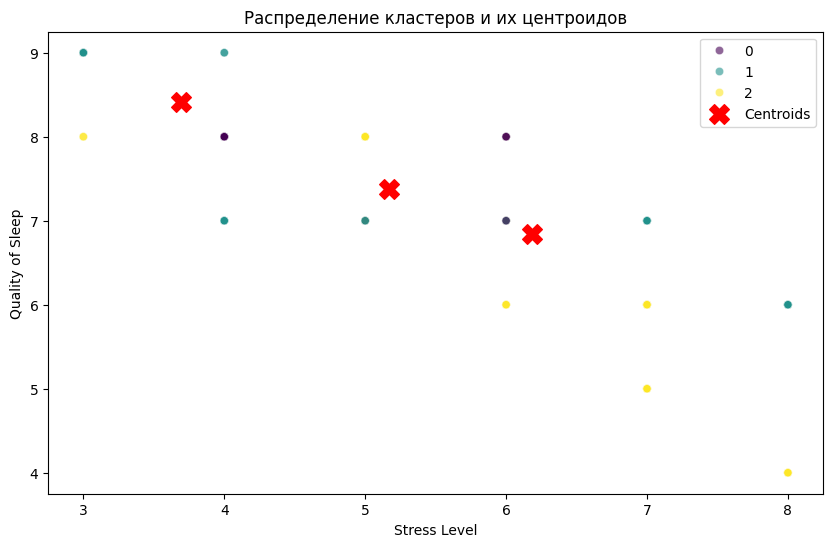

In [18]:
import matplotlib.pyplot as plt

# График для 2 признаков (например, Stress Level vs Quality of Sleep)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='Stress Level', 
    y='Quality of Sleep', 
    hue='Cluster',
    palette='viridis',
    alpha=0.6
)
# Отмечаем центроиды
plt.scatter(
    centroids['Stress Level'], 
    centroids['Quality of Sleep'],
    marker='X', 
    s=200, 
    c='red',
    label='Centroids'
)
plt.legend()
plt.title('Распределение кластеров и их центроидов')
plt.savefig('clusters_centroids.png')
plt.show()

In [21]:
# Добавим интерпретацию кластеров
cluster_names = {
    0: "Здоровые (низкий стресс, хороший сон)",
    1: "Умеренные показатели",
    2: "Группа риска (высокий стресс, плохой сон)"
}

# Сводная таблица с ключевыми метриками
cluster_summary = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Stress Level': ['mean', 'median'],
    'Quality of Sleep': ['mean', lambda x: (x < 5).mean()],  # Доля людей с плохим сном
    'Systolic_BP': 'median'
}).round(1)

# Добавляем названия кластеров
cluster_summary['Интерпретация'] = cluster_names.values()
print(cluster_summary)

          Age Stress Level        Quality of Sleep            Systolic_BP  \
         mean         mean median             mean <lambda_0>      median   
Cluster                                                                     
0        44.5          3.7    4.0              8.4        0.0       119.5   
1        51.1          5.2    4.0              7.4        0.0       140.0   
2        36.6          6.2    6.0              6.8        0.0       130.0   

                                     Интерпретация  
                                                    
Cluster                                             
0            Здоровые (низкий стресс, хороший сон)  
1                             Умеренные показатели  
2        Группа риска (высокий стресс, плохой сон)  


In [23]:
from scipy.stats import f_oneway

# ANOVA для проверки различий между кластерами
for column in ['Stress Level', 'Quality of Sleep', 'Age', 'Diastolic_BP', 'BMI_Code']:
    groups = [df[df['Cluster'] == c][column] for c in df['Cluster'].unique()]
    f_val, p_val = f_oneway(*groups)
    print(f"{column}: p-value = {p_val:.3f} {'(значимо)' if p_val < 0.05 else ''}")

Stress Level: p-value = 0.000 (значимо)
Quality of Sleep: p-value = 0.000 (значимо)
Age: p-value = 0.000 (значимо)
Diastolic_BP: p-value = 0.000 (значимо)
BMI_Code: p-value = 0.000 (значимо)


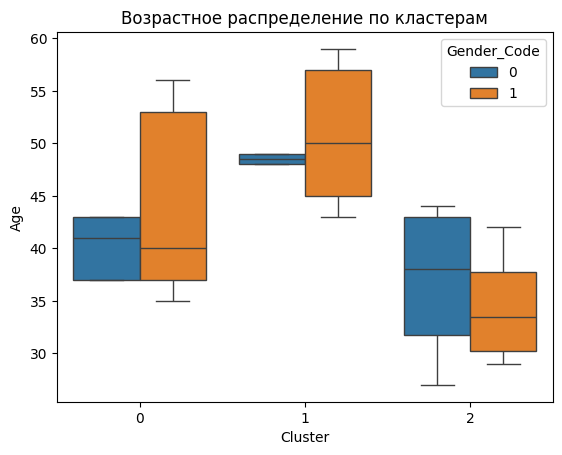

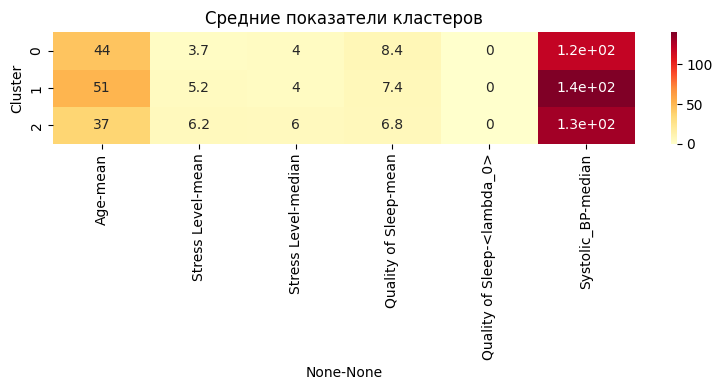

In [24]:
# 1. Распределение возраста по кластерам
sns.boxplot(data=df, x='Cluster', y='Age', hue='Gender_Code')
plt.title('Возрастное распределение по кластерам')

# 2. Тепловая карта средних значений
plt.figure(figsize=(8, 4))
sns.heatmap(cluster_summary.iloc[:, :-1], annot=True, cmap='YlOrRd')  # Исключаем колонку с названиями
plt.title('Средние показатели кластеров')
plt.tight_layout()
plt.savefig('cluster_heatmap.png')

In [25]:
# 1. Сохраняем данные с метками кластеров
df.to_csv('clustered_data.csv', index=False, encoding='utf-8')

# 2. Генерация отчета в Markdown
with open('cluster_report.md', 'w', encoding='utf-8') as f:
    f.write("# Анализ кластеров\n")
    for cluster in sorted(df['Cluster'].unique()):
        f.write(f"## {cluster_names[cluster]}\n")
        f.write(f"- **Размер:** {len(df[df['Cluster'] == cluster])} чел.\n")
        f.write(f"- **Типичный представитель:** Возраст ~{cluster_summary.loc[cluster, ('Age', 'mean')]} лет, ")
        f.write(f"стресс {cluster_summary.loc[cluster, ('Stress Level', 'mean')]}/10\n")